#TensorFlow Softmax Regression
###Importing All the Required Libraries

Code Reference and Credits - hvass-labs.org

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

###Loading MNIST Dataset and the Dataset contains 70,000 Images and they are divided in three sets i.e. Training, Test and Validation Sets. 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


###Checking Test Set, The Dataset is loaded with One_Hot_Encoding Enabled. Each Number is converted to an one hot encoding format.

In [4]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

###We also need the classes as single numbers for various comparisons and performance measures, so we convert the One-Hot encoded vectors to a single number by taking the index of the highest element. This is achieved using argmax().

In [0]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [6]:
data.test.cls[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [0]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

###Helper Function for Plotting Images

In [0]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

###Plotting few images to see if data is correct

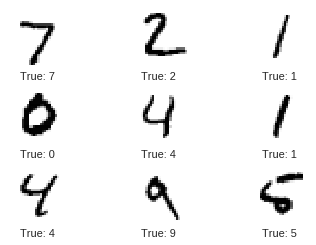

In [9]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

##TensorFlow Graph

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. 

###A TensorFlow graph consists of the following parts which will be detailed below:
- Placeholder variables are used to change the input to the graph.
- Model variables that are going to be optimized so as to make the model perform better.
- The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
- A cost measure that can be used to guide the optimization of the variables.
- An optimization method which updates the variables of the model.

###Place Holder Variables

Placeholder variables serve as the input to the graph that we may change each time we execute the graph.



In [0]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [0]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [0]:
y_true_cls = tf.placeholder(tf.int64, [None])

###Variables to be optimized

Weights and Biases are model variables that must be changed by TensorFlow so as to make the model perform better on the training data.

In [0]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [0]:
biases = tf.Variable(tf.zeros([num_classes]))

###Model

The following simple mathematical model multiplies the images in the placeholder variable x with the weights and then adds the biases. logits is a matrix with num_images rows and num_classes columns, where the element of the $i$'th row and $j$'th column is an estimate of how likely the $i$'th input image is to be of the $j$'th class.

Then, The estimates in the logit matrix i.e. each row are normalized to the values which range between 0 and 1. This is achieved using softmax function and the result is stored in y_pred.

In [0]:
logits = tf.matmul(x, weights) + biases

In [0]:
y_pred = tf.nn.softmax(logits)

In [0]:
y_pred_cls = tf.argmax(y_pred, axis=1)

To make the model better at classifying the input images, we must somehow change the variables for weights and biases. To do this we first need to know how well the model currently performs by comparing the predicted output of the model y_pred to the desired output y_true. To acheive this,  cross-entropy which is a performance measure used in classification is used. 

TensorFlow has a built-in function for calculating the cross-entropy. Note that it uses the values of the logits because it also calculates the softmax internally. But in order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy for all the image classifications.

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                        labels=y_true)

In [0]:
cost = tf.reduce_mean(cross_entropy)

###Optimization method

Since, we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the basic form of Gradient Descent where the step-size is set to 0.5. Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

In [0]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
session = tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

In [0]:
batch_size = 100

###Helper-function to perform optimization iterations

We use Stochastic Gradient Descent which only uses a small batch of images in each iteration of the optimizer. 

Optimize function performs a number of optimization iterations so as to gradually improve the weights and biases of the model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples.

In [0]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

###Dict with the test-set data to be used as input to the TensorFlow graph. 

In [0]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [0]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [0]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [0]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

###Checking Accuracy Before performing Optimization Operations. 

In [32]:
print_accuracy()

Accuracy on test-set: 9.8%


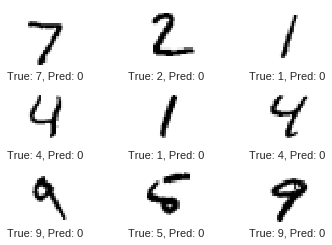

In [33]:
plot_example_errors()

The weights can also be plotted as shown below. Positive weights are red and negative weights are blue. These weights can be intuitively understood as image-filters.

For example, the weights used to determine if an image shows a zero-digit have a positive reaction (red) to an image of a circle, and have a negative reaction (blue) to images with content in the centre of the circle.

Similarly, the weights used to determine if an image shows a one-digit react positively (red) to a vertical line in the centre of the image, and react negatively (blue) to images with content surrounding that line.

Note that the weights mostly look like the digits they're supposed to recognize. This is because only one optimization iteration has been performed so the weights are only trained on 100 images. After training on several thousand images, the weights become more difficult to interpret because they have to recognize many variations of how digits can be written.

###Performance after 1st Optimization Iteration

In [0]:
optimize(num_iterations=1)

In [35]:
print_accuracy()

Accuracy on test-set: 38.6%


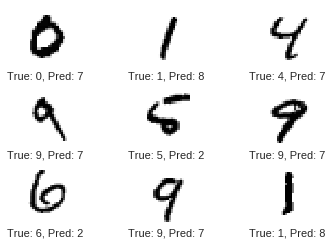

In [36]:
plot_example_errors()

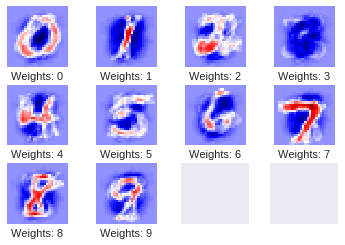

In [37]:
plot_weights()

###Performance after 10 Optimization Iterations

In [0]:
# We have already performed 1 iteration.
optimize(num_iterations=9)

In [39]:
print_accuracy()

Accuracy on test-set: 78.1%


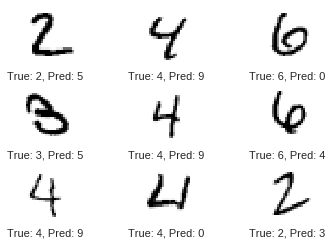

In [40]:
plot_example_errors()

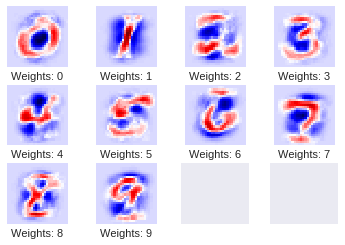

In [41]:
plot_weights()

###Performance after 1000 Iterations

In [0]:
# We have already performed 10 iterations.
optimize(num_iterations=990)

In [43]:
print_accuracy()

Accuracy on test-set: 91.5%


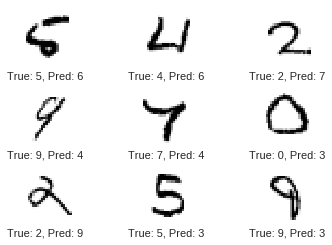

In [44]:
plot_example_errors()

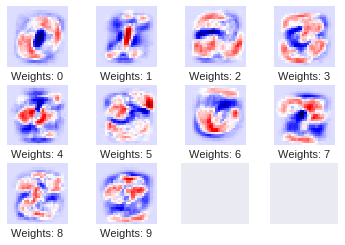

In [45]:
plot_weights()

[[ 955    0    2    3    0    7   11    1    1    0]
 [   0 1118    0    4    0    2    4    2    5    0]
 [  10   12  892   32   11    3   18   14   30   10]
 [   3    0    9  952    0   18    4    8    7    9]
 [   1    2    2    2  921    0   15    2    3   34]
 [   9    4    3   59    9  755   21    6   18    8]
 [  10    3    3    2    9   12  916    1    2    0]
 [   3   11   18   10    7    1    0  941    1   36]
 [   9   15    7   63   10   34   16   12  796   12]
 [   9    8    1   18   32    6    1   22    3  909]]


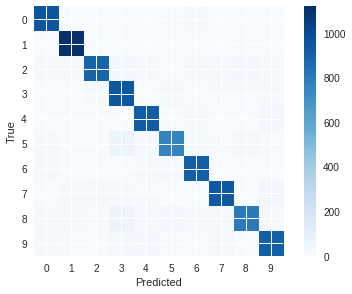

In [46]:
print_confusion_matrix()

###Improvements/Changes to the Above Algorithm

####1. Change the Learning Rate 

After changing learning Rate to 0.001, An accuracy of 79.1%. As, Previously, with Learning Rate = 0.5, the Accuracy achieved was 91.5%. It might duw to the fact that the Gradient Descent algorithm didn't converge, as the Learning Rate was Slow. 

####2. Change the optimizer to AdagradOptimizer

The accuracy achieved was 91.9% with Laerning Rate beyongd 0.2. The Learning Rate if set to 0.001, then the Accuracy achieved was 81%. With Learning Rate 0.2 and above, The Algorithm converged. There were slight differences in accuracy achieved w.r.t Optimization Iterations.

####3. Change the batch-size to e.g. 1 or 1000

Batch size of 1 resulted in lower Accuracy. Batch Size of 1000 resulted in 92.1% Accuracy. We can relate to a Recent Paper by Google, "Don't Decay the Learning Rate, Increase the Batch Size", which clearly tells us to increase the Batch Size rather than Focussing on Changing Learning Rate of the Optimizer.

####4. We can also use 
- tf.nn.sparse_softmax_cross_entropy_with_logits
- ...or equivalently tf.losses.sparse_softmax_cross_entropy

By having {1, ..., K} encodings of labels

####Key Concepts in Choosing an Activation Function

- For binary classifications, use the sigmoid function in the outer layer.
- For multi-label classifications, use the sigmoid function in the outer layer.
- For multi-class classifications, use the softmax function in the outer layer.
- For all hidden layers, use the RELU.

Reference - http://www.handsonmachinelearning.com/blog/1b4RQZ/top-3-neural-network-activation-functions


####5. Next Steps

- To implement a simple Convolutional Neural Network in TensorFlow which will have a classification accuracy of about 99%. 

Convolutional Networks work by moving small filters across the input image. This means the filters are re-used for recognizing patterns throughout the entire input image. This makes the Convolutional Networks much more powerful than Fully-Connected networks with the same number of variables. This in turn makes the Convolutional Networks faster to train.



